In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Задание 1

In [2]:
class Roulette:

    __red = [1, 3, 5, 7, 9, 12, 14, 16, 18, 19, 21, 23, 25, 27, 30, 32, 34, 36]
    
    def __init__(self,american = False):
        self.lastroll = -2
        self.american = american
 
    def __str__(self):
        if self.american:
            outstr = "Американская рулетка.\n"
        else:
            outstr = "Классическая рулетка.\n"
        if self.lastroll == -2:
            outstr += "Рулетка никогда не запускалась."
        else:
            if self.lastroll <= 0:
                outstr += "Последнее значение: зеро."
            else:
                outstr += "Последнее значение: {}. {}.".format(self.lastroll, "Красное" if self.lastroll in Roulette.__red else "Черное")
        return outstr
    
    def roll(self):
        self.lastroll = np.random.randint(0-self.american, 37)
        print(self)

In [3]:
clsR = Roulette()
clsR.roll()

Классическая рулетка.
Последнее значение: 17. Черное.


In [4]:
amR = Roulette(american=True)
amR.roll()

Американская рулетка.
Последнее значение: 3. Красное.


## Задание 2

### 2.1

Проверим, что $P(AB) = P(A)\cdot P(B)$, если $A$ и $B$ - независимые события. Пусть $A$ - орел (1), $B$ - решка (0). Тогда $AB$ - последовательность "орел-решка". Проведем 1 миллион экспериментов с 2 бросками. `np.random.randint` выбирает объекты из равномерного распределения, соответственно, для орла и для решки отдельно вероятность 50%.

In [5]:
n = 1000000
throw1 = np.random.randint(0, 2, size = n, dtype = 'int8')
throw2 = np.random.randint(0, 2, size = n, dtype = 'int8')

nCorrectThrows = np.sum(np.all([throw1 == 1, throw2 == 0], axis = 0))

print("Соответствует заданному условию {} бросков из {} произведенных.\nВероятность {}.".format(nCorrectThrows, n, round(nCorrectThrows/n, 5)))

Соответствует заданному условию 249996 бросков из 1000000 произведенных.
Вероятность 0.25.


### 2.2

Для выполнения задания создадим массив (10, n), где n - количество случайных величин. При увеличении n распределение сумм стремится к нормальному.

In [6]:
np.random.seed(1234)

pwr = [i for i in range(1,6)]
xS = []

for n in pwr:
    X = np.random.rand(10, 10**n) * 100
    xS.append(np.sum(X, axis = 0))

result = pd.DataFrame({"n": np.power(10,pwr),
                      "xS": xS})


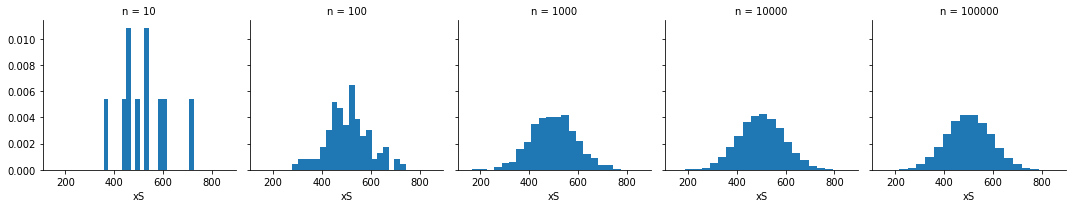

In [7]:
g = sns.FacetGrid(result, col = "n")
g.map(plt.hist, "xS", density = True, bins = 20)

## Задание 3

Обозначим вероятность события "орел" (1) $p$, тогда вероятность события "решка" (0) $q = 1 - p$. Для честной монеты $p = q = 0.5$.

In [8]:
# Код из урока
k, n = 0, 10000
a = np.random.randint(0, 2, n)
b = np.random.randint(0, 2, n)
c = np.random.randint(0, 2, n)
d = np.random.randint(0, 2, n)
x = a + b + c + d
for i in range(n):
    if x[i] == 2:
        k += 1
print(k, n, k/n)

3696 10000 0.3696


### 3.1

По условию задания, нам нужно, чтобы из 4 бросков было 2 успеха. По формуле Бернулли:

$P_{n}(k) = \frac{n!}{k!(n-k)!}p^kq^{n-k}$

In [9]:
def probNumSuccesses(n, k, p):
    fact = np.math.factorial
    return (fact(n)/(fact(k)*fact(n-k)))*(p**k)*((1-p)**(n-k))

n = 4
k = 2
p = 0.5

print("Теоретическая вероятность: {}".format(probNumSuccesses(n, k, p)))

Теоретическая вероятность: 0.375


### 3.2

Повторим расчеты для других n, k и p. Пусть из 10 бросков нужно, чтобы 3 раза выпал орел, при этом вероятность выпадения орла 0.2.

In [10]:
print(probNumSuccesses(10, 3, 0.2))

0.2013265920000001


## Задание 4

In [11]:
from itertools import permutations

In [12]:
n, k = 10, 4
print("n = {}, k = {}: {} permutations".format(n, k, len(list(permutations(range(n), k)))))

n, k = 5, 1
print("n = {}, k = {}: {} permutations".format(n, k, len(list(permutations(range(n), k)))))
print("Выбрать один объект из пяти можно 5 способами.")

n, k = 4, 4
print("n = {}, k = {}: {} permutations".format(n, k, len(list(permutations(range(n), k)))))
print("Частный случай n!, т.к. k=n")

n = 10, k = 4: 5040 permutations
n = 5, k = 1: 5 permutations
Выбрать один объект из пяти можно 5 способами.
n = 4, k = 4: 24 permutations
Частный случай n!, т.к. k=n


## Задание 5

In [13]:
# Код из урока

n = 100
r = 0.9
x = np.random.rand(n)
y = r*x + (1 - r)*np.random.rand(n)
c = np.corrcoef(x, y)
print(c)

[[1.         0.99392089]
 [0.99392089 1.        ]]


In [14]:
xMu = np.mean(x)
yMu = np.mean(y)
cc = (np.sum((x - xMu)*(y - yMu))) / (np.sqrt(np.sum(np.square(x-xMu))*np.sum(np.square(y-yMu))))

print(cc)

0.993920892590706
